# Advanced rendering

In [1]:
import numpy as np
import mujoco
import mediapy as media
import matplotlib.pyplot as plt
import time
np.random.seed(0)

""

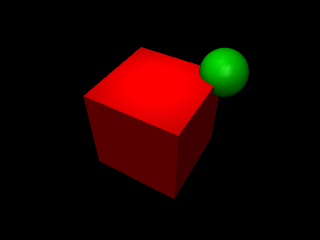

In [2]:
xml = """
<mujoco>
  <worldbody>
    <light name="top" pos="0 0 1"/>
    <body name="box_and_sphere" euler="0 0 -30">
      <joint name="swing" type="hinge" axis="1 -1 0" pos="-.2 -.2 -.2"/>
      <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
      <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </body>
  </worldbody>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)

mujoco.mj_forward(model, data)
renderer.update_scene(data)
media.show_image(renderer.render())

In [3]:
# enable joint visualization option:
scene_option = mujoco.MjvOption()
scene_option.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = True

## Enable transparency and frame visualization

""

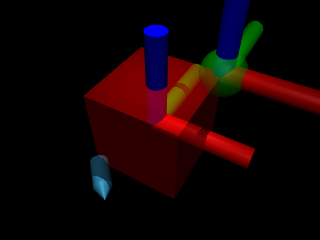

In [4]:
#@title Enable transparency and frame visualization {vertical-output: true}

scene_option.frame = mujoco.mjtFrame.mjFRAME_GEOM
scene_option.flags[mujoco.mjtVisFlag.mjVIS_TRANSPARENT] = True
renderer.update_scene(data, scene_option=scene_option)
frame = renderer.render()
media.show_image(frame)

## Depth rendering

""

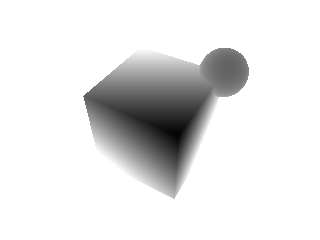

In [5]:
#@title Depth rendering {vertical-output: true}

# update renderer to render depth
renderer.enable_depth_rendering()

# reset the scene
renderer.update_scene(data)

# depth is a float array, in meters.
depth = renderer.render()

# Shift nearest values to the origin.
depth -= depth.min()
# Scale by 2 mean distances of near rays.
depth /= 2*depth[depth <= 1].mean()
# Scale to [0, 255]
pixels = 255*np.clip(depth, 0, 1)

media.show_image(pixels.astype(np.uint8))

renderer.disable_depth_rendering()

## Segmentation rendering

""

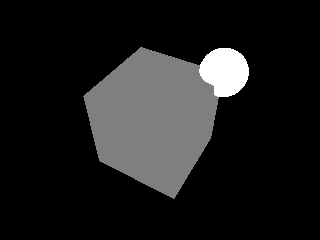

In [6]:
#@title Segmentation rendering {vertical-output: true}

# update renderer to render segmentation
renderer.enable_segmentation_rendering()

# reset the scene
renderer.update_scene(data)

seg = renderer.render()

# Display the contents of the first channel, which contains object
# IDs. The second channel, seg[:, :, 1], contains object types.
geom_ids = seg[:, :, 0]
# Infinity is mapped to -1
geom_ids = geom_ids.astype(np.float64) + 1
# Scale to [0, 1]
geom_ids = geom_ids / geom_ids.max()
pixels = 255*geom_ids
media.show_image(pixels.astype(np.uint8))

renderer.disable_segmentation_rendering()